# HW-03：CSMAR 数据处理
- 姓名：宁确
- 学号：22361064
- 内容介绍：生成A股上市公司财务评价指标，进行描述性统计、跨期及跨行业分析
- 说明：本人在完成作业过程中使用了Copilot、Kimi等AI工具，关键提示词参见[Kimi对话过程](https://www.kimi.com/chat/d3g8egt43356gai77b90)

## 读入及合并数据

In [1]:
import pandas as pd

# 读入excel文件
PL1 = pd.read_excel('CSMAR\data_raw_zip\利润表-现金流量表-2000-2010\跨表查询_沪深京股票(年频).xlsx', header=0, skiprows=[1, 2, 3])
PL2 = pd.read_excel('CSMAR\data_raw_zip\利润表-现金流量表-2011-2024\跨表查询_沪深京股票(年频).xlsx', header=0, skiprows=[1, 2, 3])
BS1 = pd.read_excel('CSMAR\data_raw_zip\资产负债表-2000-2010\跨表查询_沪深京股票(年频).xlsx', header=0, skiprows=[1, 2, 3])
BS2 = pd.read_excel('CSMAR\data_raw_zip\资产负债表-2011-2024\跨表查询_沪深京股票(年频).xlsx', header=0, skiprows=[1, 2, 3])
Info = pd.read_excel('CSMAR\data_raw_zip\上市公司基本信息年度表\STK_LISTEDCOINFOANL.xlsx', header=0, skiprows=[1, 2])
InfoChg = pd.read_excel('CSMAR\data_raw_zip\上市公司基本信息变更表2000-2024\STK_LISTEDCOINFOCHG.xlsx', header=0, skiprows=[1, 2])
Variables = pd.read_excel('CSMAR\data_raw_zip\CSMAR常用变量-2000-2024\常用变量查询（年度）.xlsx', header=0, skiprows=[1, 2])

d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
d:\python\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no de

In [2]:
# 展示表结构
pd.set_option('display.max_columns', None)
pd.set_option('display.max_info_columns', 999)

PL1.info()
print()
print(PL1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64163 entries, 0 to 64162
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   64163 non-null  int64  
 1   stknme                 64163 non-null  object 
 2   listingDate            64163 non-null  object 
 3   EndDate                64163 non-null  int64  
 4   FS_Comins-B001101000   16859 non-null  float64
 5   FS_Comins-Bbd1102203   5276 non-null   float64
 6   FS_Comins-B001201000   16845 non-null  float64
 7   FS_Comins-B001207000   16880 non-null  float64
 8   FS_Comins-B001209000   16450 non-null  float64
 9   FS_Comins-B001210000   16893 non-null  float64
 10  FS_Comins-B001211000   16925 non-null  float64
 11  FS_Comins-B001300000   17079 non-null  float64
 12  FS_Comins-B001000000   17079 non-null  float64
 13  FS_Comins-B002000000   17079 non-null  float64
 14  FS_Comins-B003000000   7474 non-null   float64
 15  FS

In [3]:
PL2.info()
print()
print(PL2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81662 entries, 0 to 81661
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   code                   81662 non-null  int64  
 1   stknme                 81662 non-null  object 
 2   listingDate            81662 non-null  object 
 3   EndDate                81662 non-null  int64  
 4   FS_Comins-B001101000   53704 non-null  float64
 5   FS_Comins-Bbd1102203   13899 non-null  float64
 6   FS_Comins-B001201000   53687 non-null  float64
 7   FS_Comins-B001207000   54705 non-null  float64
 8   FS_Comins-B001209000   53213 non-null  float64
 9   FS_Comins-B001210000   53905 non-null  float64
 10  FS_Comins-B001211000   53900 non-null  float64
 11  FS_Comins-B001300000   54711 non-null  float64
 12  FS_Comins-B001000000   54711 non-null  float64
 13  FS_Comins-B002000000   54711 non-null  float64
 14  FS_Comins-B003000000   54704 non-null  float64
 15  FS

In [4]:
BS1.info()
print()
print(BS1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64163 entries, 0 to 64162
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code                  64163 non-null  int64  
 1   stknme                64163 non-null  object 
 2   listingDate           64163 non-null  object 
 3   EndDate               64163 non-null  int64  
 4   FS_Combas-A001101000  17052 non-null  float64
 5   FS_Combas-A001107000  7215 non-null   float64
 6   FS_Combas-A001109000  9440 non-null   float64
 7   FS_Combas-A001123000  16916 non-null  float64
 8   FS_Combas-A001100000  16909 non-null  float64
 9   FS_Combas-A001212000  17079 non-null  float64
 10  FS_Combas-A001204000  7056 non-null   float64
 11  FS_Combas-A001207000  8903 non-null   float64
 12  FS_Combas-A001218000  17020 non-null  float64
 13  FS_Combas-A001219000  6925 non-null   float64
 14  FS_Combas-A001200000  16908 non-null  float64
 15  FS_Combas-A00100000

In [5]:
BS2.info()
print()
print(BS2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81662 entries, 0 to 81661
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   code                  81662 non-null  int64  
 1   stknme                81662 non-null  object 
 2   listingDate           81662 non-null  object 
 3   EndDate               81662 non-null  int64  
 4   FS_Combas-A001101000  54409 non-null  float64
 5   FS_Combas-A001107000  33405 non-null  float64
 6   FS_Combas-A001109000  11376 non-null  float64
 7   FS_Combas-A001123000  53317 non-null  float64
 8   FS_Combas-A001100000  53914 non-null  float64
 9   FS_Combas-A001212000  54708 non-null  float64
 10  FS_Combas-A001204000  22158 non-null  float64
 11  FS_Combas-A001207000  11377 non-null  float64
 12  FS_Combas-A001218000  54400 non-null  float64
 13  FS_Combas-A001219000  21189 non-null  float64
 14  FS_Combas-A001200000  53913 non-null  float64
 15  FS_Combas-A00100000

In [6]:
Info.info()
print()
print(Info.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64171 entries, 0 to 64170
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Symbol               64171 non-null  int64  
 1   ShortName            64171 non-null  object 
 2   EndDate              64171 non-null  object 
 3   ListedCoID           64171 non-null  int64  
 4   SecurityID           64171 non-null  int64  
 5   IndustryName         64170 non-null  object 
 6   IndustryCode         64170 non-null  object 
 7   IndustryNameC        57607 non-null  object 
 8   IndustryCodeC        57607 non-null  object 
 9   IndustryNameD        64171 non-null  object 
 10  IndustryCodeD        64171 non-null  object 
 11  RegisterAddress      64171 non-null  object 
 12  OfficeAddress        64171 non-null  object 
 13  Zipcode              64149 non-null  object 
 14  Secretary            64095 non-null  object 
 15  SecretaryTel         64092 non-null 

In [7]:
InfoChg.info()
print()
print(InfoChg.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160276 entries, 0 to 160275
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Symbol            160276 non-null  int64 
 1   AnnouncementDate  141610 non-null  object
 2   ImplementDate     160276 non-null  object
 3   ChangedItem       160276 non-null  object
 4   SecurityID        160276 non-null  int64 
 5   ListedCoID        160276 non-null  int64 
 6   Value_Before      107567 non-null  object
 7   Value_After       152378 non-null  object
dtypes: int64(3), object(5)
memory usage: 9.8+ MB

   Symbol AnnouncementDate ImplementDate ChangedItem    SecurityID  \
0       1       1994-04-16    1991-04-03        办公地址  201000000001   
1       1              NaN    1991-04-03        所属省份  201000000001   
2       1              NaN    1991-04-03        注册地址  201000000001   
3       1              NaN    1991-04-03        公司全称  201000000001   
4       1          

In [8]:
Variables.info()
print()
print(Variables.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61456 entries, 0 to 61455
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Stkcd                     61456 non-null  int64  
 1   accper                    61456 non-null  int64  
 2   stknme                    61456 non-null  object 
 3   AnaAttention              37513 non-null  float64
 4   Audittyp                  61139 non-null  object 
 5   InternationalBig4         61140 non-null  float64
 6   Ysmvosd                   61456 non-null  float64
 7   Ysmvttl                   61456 non-null  float64
 8   Yretwd                    56806 non-null  float64
 9   PropertyRightsNature      56414 non-null  float64
 10  Seperation                54589 non-null  float64
 11  ActualControllerNatureID  56413 non-null  object 
 12  OwnershipProportion       54819 non-null  float64
 13  ControlProportion         54855 non-null  float64
 14  Shrcr1

In [9]:
# 合并不同年份的利润表
PL = pd.concat([PL1, PL2], axis=0, ignore_index=True)

# 合并不同年份的资产负债表
BS = pd.concat([BS1, BS2], axis=0, ignore_index=True)

# 处理Info表的列名和日期格式
Info.rename(columns={'Symbol': 'code'}, inplace=True)
Info['EndDate'] = pd.to_datetime(Info['EndDate']).dt.year

# 处理Variables表的列名
Variables.rename(columns={'Stkcd': 'code', 'accper': 'EndDate'}, inplace=True)

# 合并所有数据表及去除多余列
data = (PL
        .merge(BS,      on=['code', 'EndDate'], suffixes=('', '_bs'))
        .merge(Info,    on=['code', 'EndDate'], suffixes=('', '_info'))
        .merge(Variables, on=['code', 'EndDate'], suffixes=('', '_var'))
)
data = data.loc[:, ~data.columns.str.endswith(('_bs', '_info', '_var'))]

In [10]:
data.info()
print()
print(data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61160 entries, 0 to 61159
Data columns (total 132 columns):
 #    Column                    Non-Null Count  Dtype  
---   ------                    --------------  -----  
 0    code                      61160 non-null  int64  
 1    stknme                    61160 non-null  object 
 2    listingDate               61160 non-null  object 
 3    EndDate                   61160 non-null  int64  
 4    FS_Comins-B001101000      60080 non-null  float64
 5    FS_Comins-Bbd1102203      17691 non-null  float64
 6    FS_Comins-B001201000      60059 non-null  float64
 7    FS_Comins-B001207000      60989 non-null  float64
 8    FS_Comins-B001209000      59361 non-null  float64
 9    FS_Comins-B001210000      60280 non-null  float64
 10   FS_Comins-B001211000      60309 non-null  float64
 11   FS_Comins-B001300000      61156 non-null  float64
 12   FS_Comins-B001000000      61156 non-null  float64
 13   FS_Comins-B002000000      61156 non-null  fl

## 生成新变量、数据清洗及描述性统计

In [11]:
import numpy as np

# Lev = 总负债率 = 总负债/总资产
data['Lev'] = data['FS_Combas-A002000000'] / data['FS_Combas-A001000000']
# SL = 流动负债率 = 流动负债/总资产
data['SL'] = data['FS_Combas-A002100000'] / data['FS_Combas-A001000000']
# LL = 长期负债率 = 长期负债/总资产
data['LL'] = data['FS_Combas-A002206000'] / data['FS_Combas-A001000000']
# SDR = 短债比率 = 流动负债/总负债
data['SDR'] = data['FS_Combas-A002100000'] / data['FS_Combas-A002000000']
# Cash = 现金比率 = 公司年末持有的现金和现金等价物/总资产
data['Cash'] = data['FS_Combas-A001101000'] / data['FS_Combas-A001000000']
# ROA = 净利润/总资产
data['ROA'] = data['FS_Comins-B002000000'] / data['FS_Combas-A001000000']
# ROE = 净利润/净资产
data['ROE'] = data['FS_Comins-B002000000'] / data['FS_Combas-A003000000']
# SLoan = 短期银行借款/总资产
data['SLoan'] = data['FS_Combas-A002101000'] / data['FS_Combas-A001000000']
# LLoan = 长期银行借款/总资产
data['LLoan'] = data['FS_Combas-A002201000'] / data['FS_Combas-A001000000']
# Top1 = 第一大股东持股比例
data.rename(columns={'Shrcr1': 'Top1'}, inplace=True)
# HHI5 = 前五大股东持股比例平方之和 (赫芬达尔指数)
data.rename(columns={'Shrhfd5': 'HHI5'}, inplace=True)
# Size = ln(总资产+1)
data['Size'] = np.log(data['FS_Combas-A001000000'] + 1)
# Age = 公司上市年限
data['Age'] = data['EndDate'] - pd.to_datetime(data['listingDate']).dt.year

In [12]:
from scipy.stats import mstats

# 对财务指标进行缩尾处理，默认1%和99%分位数
def winsorize_series(x, limits=(0.01, 0.01)):
    """返回缩尾后的 Series，缺失值保持 NaN"""
    if x.isna().all():
        return x
    return mstats.winsorize(x, limits=limits, nan_policy='omit')

cont_vars = ['Lev', 'SL', 'LL', 'SDR', 'Cash', 'ROA', 'ROE',
             'SLoan', 'LLoan', 'Top1', 'HHI5', 'Size', 'Age']

for col in cont_vars:
    if col in data.columns:
        data[col] = winsorize_series(data[col])

In [13]:
# 按年度统计描述性指标
desc_table = (data.groupby('EndDate')[cont_vars]
                .agg(['mean', 'median', 'std', 'min', 'max'])
                .round(2))         

# 结果呈现
print(desc_table)

          Lev                             SL                              \
         mean median   std   min   max  mean median    std   min     max   
EndDate                                                                    
2000     0.44   0.42  0.19  0.05  1.09  0.39   0.35   0.23  0.04    2.62   
2001     0.45   0.44  0.20  0.05  1.09  0.41   0.37   0.38  0.04    7.25   
2002     0.47   0.45  0.20  0.05  1.09  0.43   0.39   0.38  0.04    7.39   
2003     0.49   0.49  0.21  0.05  1.09  0.45   0.40   0.59  0.04   17.65   
2004     0.51   0.51  0.21  0.05  1.09  0.47   0.42   0.55  0.04   12.10   
2005     0.53   0.53  0.22  0.05  1.09  0.50   0.44   0.79  0.04   25.20   
2006     0.54   0.54  0.22  0.05  1.09  1.10   0.45  21.41  0.04  800.30   
2007     0.52   0.52  0.21  0.05  1.09  0.63   0.42   3.87  0.04  124.02   
2008     0.51   0.51  0.22  0.05  1.09  0.59   0.41   3.92  0.04  142.72   
2009     0.51   0.51  0.23  0.05  1.09  0.54   0.39   3.53  0.04  138.38   
2010     0.4

In [14]:
# 核查资产负债率大于1的情况
# 筛选 Lev > 1
abnormal = data[data['Lev'] > 1].copy()

# 核对“资产 < 负债”
abnormal['check'] = abnormal['FS_Combas-A001000000'] < abnormal['FS_Combas-A002000000']

# 打印结果
out_cols = ['code', 'EndDate',
            'FS_Combas-A001000000', 'FS_Combas-A002000000', 'check']
print(abnormal[out_cols].rename(
    columns={'FS_Combas-A001000000': '资产',
             'FS_Combas-A002000000': '负债'}))

# 是否存在 check==False
has_false = (~abnormal['check']).any()
print('所有资产负债率大于1的情况均为资产小于负债导致！')
if has_false:
    print('对应行：')
    print(abnormal[~abnormal['check']][out_cols].rename(
        columns={'FS_Combas-A001000000': '资产',
                 'FS_Combas-A002000000': '负债'}))

         code  EndDate            资产            负债  check
2           3     2000  2.494446e+09  2.993068e+09   True
14         15     2000  7.230705e+08  1.389480e+09   True
138       535     2000  4.702360e+08  8.468079e+08   True
139       536     2000  3.770616e+08  4.119733e+08   True
149       546     2000  3.960240e+08  4.891669e+08   True
...       ...      ...           ...           ...    ...
59036  600462     2023  3.963903e+08  4.101914e+08   True
59243  600715     2023  3.005500e+09  4.153578e+09   True
59403  600898     2023  2.522679e+08  2.697734e+08   True
59956  603363     2023  1.362521e+10  1.412843e+10   True
60782  688520     2023  2.718536e+09  3.324351e+09   True

[726 rows x 5 columns]
所有资产负债率大于1的情况均为资产小于负债导致！


In [15]:
# 核查2010年流动负债率为inf的情况
inf_company = data[(data['EndDate'] == 2010) & (np.isinf(data['SL']))]

# 打印结果
print('2010 年流动负债率 SL = inf 的公司：')
cols = ['code', 'EndDate', 'SL', 'FS_Combas-A001000000', 'FS_Combas-A002100000']
print(inf_company[cols].rename(columns={
        'FS_Combas-A001000000': '总资产',
        'FS_Combas-A002100000': '流动负债'}))

# 删除流动负债率为inf的观测值
data.drop(index=inf_company.index, inplace=True)

2010 年流动负债率 SL = inf 的公司：
         code  EndDate   SL  总资产        流动负债
15244  600699     2010  inf  0.0  1500497.34


In [16]:
# 重新进行描述性统计并输出结果
desc_table = (data.groupby('EndDate')[cont_vars]
                .agg(['mean', 'median', 'std', 'min', 'max'])
                .round(2))         

print(desc_table)

# 导出到 Excel（每个指标一个 sheet）
with pd.ExcelWriter('desc_stats_by_year.xlsx') as writer:
    for var in cont_vars:
        sheet = desc_table[var].reset_index()
        sheet.to_excel(writer, sheet_name=var, index=False)

          Lev                             SL                              \
         mean median   std   min   max  mean median    std   min     max   
EndDate                                                                    
2000     0.44   0.42  0.19  0.05  1.09  0.39   0.35   0.23  0.04    2.62   
2001     0.45   0.44  0.20  0.05  1.09  0.41   0.37   0.38  0.04    7.25   
2002     0.47   0.45  0.20  0.05  1.09  0.43   0.39   0.38  0.04    7.39   
2003     0.49   0.49  0.21  0.05  1.09  0.45   0.40   0.59  0.04   17.65   
2004     0.51   0.51  0.21  0.05  1.09  0.47   0.42   0.55  0.04   12.10   
2005     0.53   0.53  0.22  0.05  1.09  0.50   0.44   0.79  0.04   25.20   
2006     0.54   0.54  0.22  0.05  1.09  1.10   0.45  21.41  0.04  800.30   
2007     0.52   0.52  0.21  0.05  1.09  0.63   0.42   3.87  0.04  124.02   
2008     0.51   0.51  0.22  0.05  1.09  0.59   0.41   3.92  0.04  142.72   
2009     0.51   0.51  0.23  0.05  1.09  0.54   0.39   3.53  0.04  138.38   
2010     0.4

- Lev：年均值0.41-0.54，中枢稳定，个别公司资不抵债
- SL：2010-2023年均值0.31-0.42，短期负债占主导
- LL：年均值0.06-0.10，长期融资占比少
- SDR：年均值0.8-0.87，极值1.3，短债占八成
- Cash：年均值0.14-0.25，危机后高点，现金持有先升后降
- ROA：年均值0-0.08，盈利波动大，近年3%左右
- ROE：年均值-1.25-0.57，波动大于ROA，净资产为负样本存在
- SLoan：年均值0.08-0.53，银行短贷占比大于长贷
- LLoan：年均值0.04-0.08，长期银行融资使用率低
- Top1：年均值32%-43%逐年降低，股权分散化趋势
- HHI5：年均值0.15-0.23下降，集中度同步降低
- Size：年均值21-22.3，标准差扩大，公司体量差异加大
- Age：年均值3.6-10.5年，上限28年

## 绘制Lev、ROA和Cash的时序图

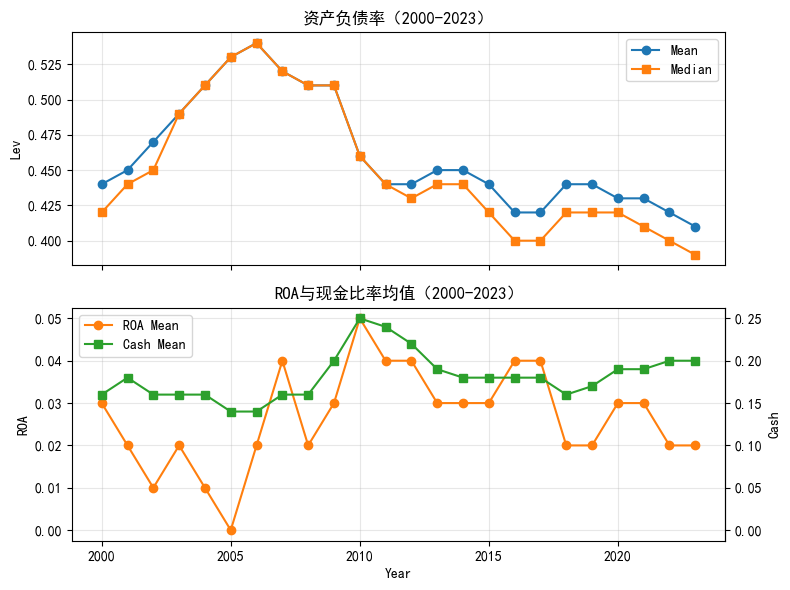

In [17]:
import matplotlib.pyplot as plt
# 中文显示修复
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取描述性统计结果
desc = pd.read_excel('desc_stats_by_year.xlsx', sheet_name=None)

# 拼接 Lev / ROA / Cash 的年度均值、中位数
lev  = desc['Lev'][['EndDate', 'mean', 'median']].rename(columns={'mean': 'Lev_mean', 'median': 'Lev_median'})
roa  = desc['ROA'][['EndDate', 'mean']].rename(columns={'mean': 'ROA_mean'})
cash = desc['Cash'][['EndDate', 'mean']].rename(columns={'mean': 'Cash_mean'})

df = lev.merge(roa, on='EndDate').merge(cash, on='EndDate')
df['year'] = df['EndDate'].astype(int)

# 画图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

# Lev 均值 & 中位数
ax1.plot(df['year'], df['Lev_mean'], marker='o', label='Mean')
ax1.plot(df['year'], df['Lev_median'], marker='s', label='Median')
ax1.set_title('资产负债率（2000-2023）')
ax1.set_ylabel('Lev')
ax1.legend()
ax1.grid(alpha=0.3)

# ROA & Cash 双轴
ratio = df['Cash_mean'].max() / df['ROA_mean'].max()
ax2_twin = ax2.secondary_yaxis('right', functions=(lambda x: x * ratio, lambda x: x / ratio))
ax2_twin.set_ylabel('Cash')

l1 = ax2.plot(df['year'], df['ROA_mean'], color='C1', marker='o', label='ROA Mean')
l2 = ax2.plot(df['year'], df['Cash_mean'] / ratio, color='C2', marker='s', label='Cash Mean')

ax2.legend(['ROA Mean', 'Cash Mean'], loc='upper left')

ax2.set_title('ROA与现金比率均值（2000-2023）')
ax2.set_xlabel('Year')
ax2.set_ylabel('ROA')
ax2.grid(alpha=0.3)

fig.tight_layout()
plt.show()

### 资产负债率（Lev）
- **均值** 在 0.41–0.54 区间缓慢抬升后走平，2008 年后小幅回落并趋稳 
- **均值 > 中位数** 且差距扩大，表明高杠杆公司拉高了整体水平，右尾风险持续存在

### ROA & 现金比率（Cash）
- **ROA** 呈现明显周期性：  
  - 2007 年峰值 ≈ 0.08，随后金融危机快速下滑
  - 2009–2016 长期低迷（均值 0.02–0.04） 
  - 2017 起微弱修复，2020–2023 维持在 0.03 左右，盈利压力仍大
- **现金比率** 与 ROA 呈反向波动：  
  - 2009–2011 逆势冲高至 0.25，体现“盈利下行期保现金”的防御策略  
  - 2012 后随盈利企稳逐步回落，2020 再次小幅抬升，反映疫情不确定性下现金储备意识增强

## 负债率的行业特征分析

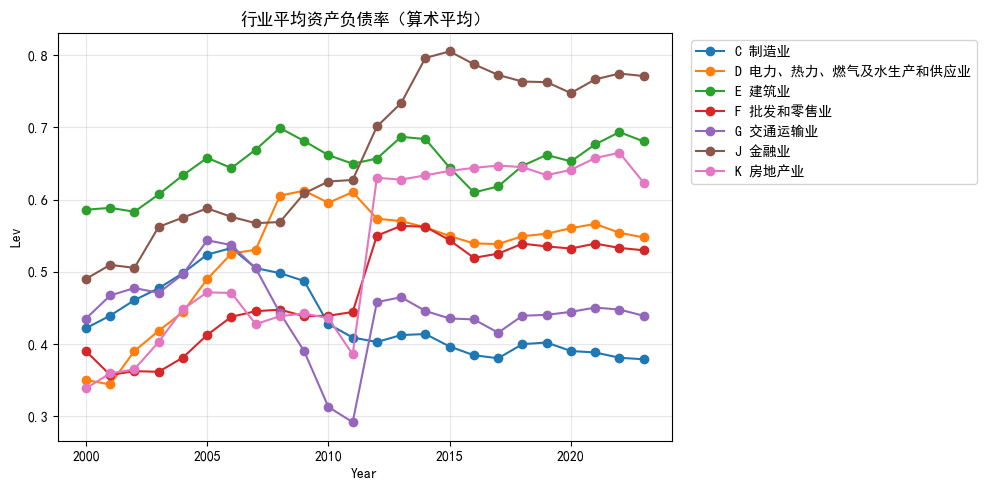

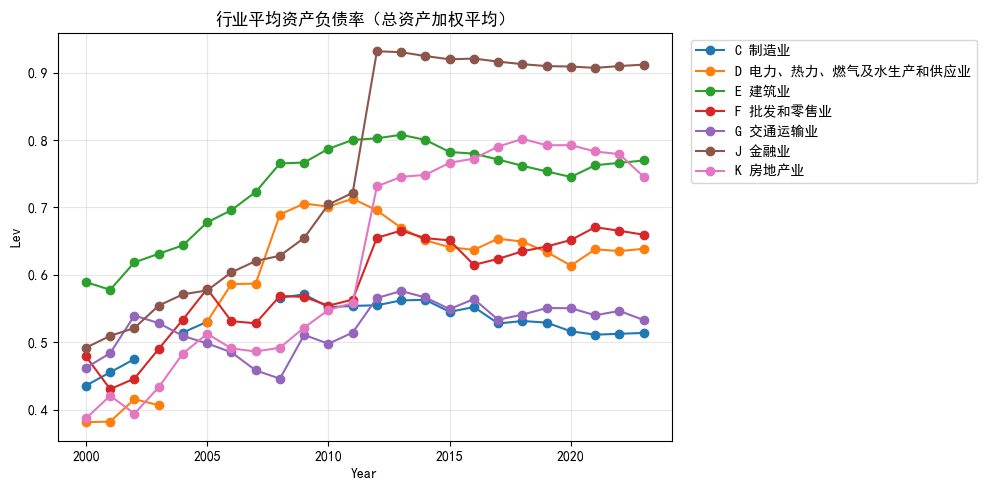

In [18]:
# 行业字母与中文名
INDS     = ['C', 'D', 'E', 'F', 'G', 'J', 'K']
IND_NAME = {'C':'制造业', 'D':'电力、热力、燃气及水生产和供应业', 
            'E':'建筑业', 'F':'批发和零售业',
            'G':'交通运输业', 'J':'金融业', 'K':'房地产业'}

# 取行业首字母
data['ind'] = data['IndustryCode'].str[0]

# 聚合函数
def industry_agg(df, wt_col=None):
    """wt_col=None -> 算术；wt_col=总资产 -> 加权"""
    if wt_col is None:
        return df.groupby(['EndDate', 'ind'])['Lev'].mean().reset_index()
    else:
        return (df.groupby(['EndDate', 'ind'])
                  .apply(lambda g: np.average(g['Lev'], weights=g[wt_col]))
                  .reset_index(name='Lev'))

lev_avg  = industry_agg(data)                       # 算术
lev_wt_a = industry_agg(data, 'FS_Combas-A001000000')  # 总资产加权

# 时序图
def ts_plot(df, title, fname):
    plt.figure(figsize=(10, 5))
    for ind in INDS:
        tmp = df.query("ind == @ind")
        plt.plot(tmp['EndDate'], tmp['Lev'], marker='o', label=f"{ind} {IND_NAME[ind]}")
    plt.title(title)
    plt.xlabel('Year'); plt.ylabel('Lev')
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
    plt.grid(alpha=0.3)
    plt.tight_layout(); plt.savefig(fname); plt.show()

ts_plot(lev_avg,  '行业平均资产负债率（算术平均）','ind_lev_avg.png')
ts_plot(lev_wt_a, '行业平均资产负债率（总资产加权平均）','ind_lev_wt_a.png')

### 算术平均 vs. 总资产加权平均 —— 行业负债率时序差异

- **曲线平滑度**
   - 算术平均：受高杠杆小公司拉动，2006-2008 出现尖峰（制造业、批零尤为明显）
   - 总资产加权：以大公司为权重，曲线更平滑，极值消失

- **绝对水平**
   - 算术 Lev 普遍高于加权 Lev（≈0.05–0.10 个百分点）
   - 例外：金融业（J）两种算法几乎重合，说明行业内部规模差异小且杠杆分布均匀

- **行业排序稳定性**
   - 近年来两种方法均保持：J(金融) > K(房地产)/E(建筑) > D(电力)/F(批零) > G(交通) > C(制造)
   - 加权后各年间差距缩小，跨行业对比更稳健

- **合理性判断**
   - 若关注行业整体风险（例如宏观审慎监管），总资产加权更合理——大公司的负债决定行业总量
   - 若研究公司分布特征（例如企业行为差异），算术平均更合理——每家公司一票，不掩盖小企业高杠杆现象

In [20]:
# 列表呈现行业财务指标情况
table_years = range(2001, 2024, 2)
table_vars  = ['SLoan','LLoan','Lev','Cash','ROA','ROE']
tbl = (data[data['ind'].isin(['C', 'D', 'E', 'F', 'G', 'J', 'K'])]
       .query("EndDate in @table_years")
       .groupby(['EndDate', 'ind'])[table_vars].mean()
       .reset_index())

with pd.ExcelWriter('industry_lev_table.xlsx') as w:
    for y in table_years:
        tmp = tbl.query("EndDate == @y").set_index('ind')
        tmp.to_excel(w, sheet_name=str(y))

print(tbl.head())

   EndDate ind     SLoan     LLoan       Lev      Cash       ROA       ROE
0     2001   C  0.181727  0.054860  0.439410  0.179510  0.016855  0.023290
1     2001   D  0.080644  0.093642  0.344190  0.154345  0.053151  0.084122
2     2001   E  0.174406  0.040511  0.588493  0.158679  0.008544  0.013694
3     2001   F  0.104522  0.083982  0.357308  0.181736  0.042985  0.063525
4     2001   G  0.194638  0.027389  0.467266  0.238834  0.031014  0.078848


### 行业财务指标速览（2001-2023 奇数年）

- **C 制造业**  
  Lev：0.44→0.38 逐年降；SLoan 0.18→0.08 短银占收缩；LLoan≈0.05 长期银行债低；Cash 0.18→0.20 稳中有升；ROA 0.017→0.027 盈利小幅修复；ROE 0.023→0.029 中枢 3% 左右

- **D 电力、热力等**  
  Lev：0.34→0.55 先升后稳；SLoan 0.08→0.08 保持低位；LLoan 0.09→0.22 长期借款占比最高；Cash 0.15→0.12 下降；ROA 0.05→0.03 盈利承压；ROE 0.08→0.07 公用事业特征明显

- **E 建筑业**  
  Lev：0.59→0.68 持续高位；SLoan 0.17→0.07 短银降；LLoan 0.04→0.10 长期债增加；Cash 0.16→0.14 稳定；ROA 0.009→-0.009 近年亏损；ROE 0.014→-0.07 盈利恶化最显著

- **F 批发零售**  
  Lev：0.36→0.53 升后稳；SLoan 0.10→0.12 短银占回升；LLoan 0.08→0.06 长期债低；Cash 0.18→0.18 持平；ROA 0.043→0.011 盈利下滑；ROE 0.06→0.01 波动大

- **G 交通运输**  
  Lev：0.47→0.44 中枢最低；SLoan 0.19→0.07 短银大幅降；LLoan 0.03→0.14 长期债提升；Cash 0.24→0.15 下降；ROA 0.03→0.04 盈利修复最好；ROE 0.08→0.07 稳定

- **J 金融业**  
  Lev：0.51→0.77 持续上升；SLoan 0.23→0.03 短银骤降；LLoan 0.04→0.05 长期债低；Cash 0.14→0.21 升后稳；ROA 0.003→0.008 微利；ROE -0.02→0.05 波动大

- **K 房地产业**  
  Lev：0.36→0.62 升后高位；SLoan 0.11→0.04 短银降；LLoan 0.06→0.14 长期债增加；Cash 0.19→0.13 下降；ROA 0.038→-0.001 近年亏损；ROE 0.06→-0.05 盈利恶化

## 股权结构分析

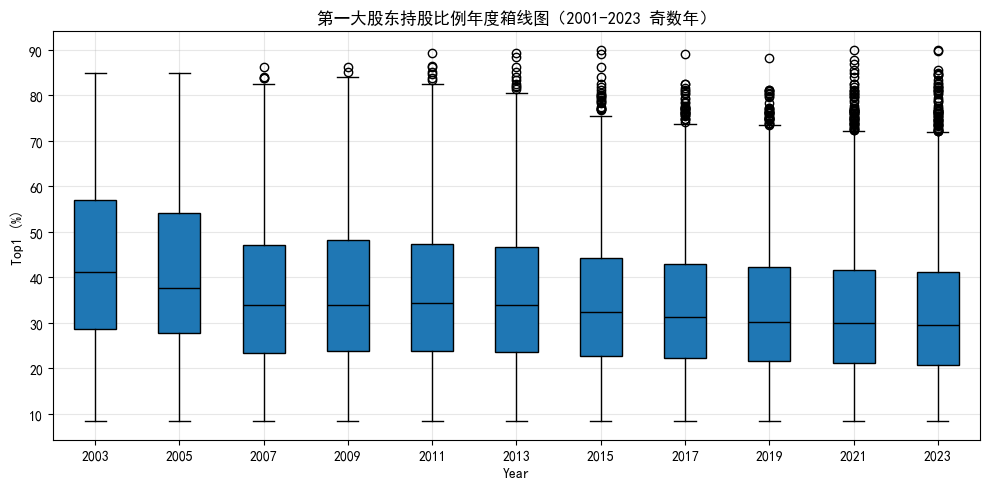

In [22]:
# 只留目标年份（奇数年）
years = [2003, 2005, 2007, 2009, 2011, 2013, 2015, 2017, 2019, 2021, 2023]
plot_df = data.query("EndDate in @years")[['EndDate', 'Top1']].copy()

# 3. 绘制箱线图
plt.figure(figsize=(10, 5))
plt.boxplot([plot_df.query("EndDate == @y")['Top1'].dropna() for y in years],
            labels=years, patch_artist=True, medianprops={'color':'black'})

plt.title('第一大股东持股比例年度箱线图（2001-2023 奇数年）')
plt.xlabel('Year')
plt.ylabel('Top1 (%)')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('top1_boxplot.png', dpi=300)
plt.show()

### 2005 vs. 2007 vs. 2023 箱线图差异及原因

**2005 → 2007：箱体整体下移**  
- 均值从 40.4% 降至 35.8%，中位数 37.7% → 33.9% 
- 2006-2007 处于股权分置改革高峰，大量国有大股东减持或稀释，政策驱动 Top1 集中度快速下降

**2007 → 2023：继续下移且箱体变扁**  
- 均值再降 3.8 pct 至 32.0%，中位数 29.5%，但标准差持平（≈15%），说明整体分散而非极端值拉大
- 注册制、科创板、北交所等多层次市场扩容，上市公司数量激增，股权自然分散
- 2023 年样本数远高于 2007（>3 倍），右尾略抬（Max 90%）反映个别民营创始人仍保持高控股